In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set plot style
sns.set(style="whitegrid")


In [15]:
# Load dataset
df = pd.read_csv("Downloads/flights_sample_3m.csv")


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

In [19]:
print(df.shape)

(3000000, 32)


In [21]:
print(df.head())

      FL_DATE                AIRLINE                AIRLINE_DOT AIRLINE_CODE  \
0  2019-01-09  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
1  2022-11-19   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
2  2022-07-22  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
3  2023-03-06   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
4  2020-02-23       Spirit Air Lines       Spirit Air Lines: NK           NK   

   DOT_CODE  FL_NUMBER ORIGIN          ORIGIN_CITY DEST  \
0     19977       1562    FLL  Fort Lauderdale, FL  EWR   
1     19790       1149    MSP      Minneapolis, MN  SEA   
2     19977        459    DEN           Denver, CO  MSP   
3     19790       2295    MSP      Minneapolis, MN  SFO   
4     20416        407    MCO          Orlando, FL  DFW   

               DEST_CITY  ...  DIVERTED  CRS_ELAPSED_TIME  ELAPSED_TIME  \
0             Newark, NJ  ...       0.0             186.0         176.0   
1            S

In [23]:
print(df.isnull().sum())

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                     79942
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER          2466137
DELAY_DUE_WEATHER   

In [27]:
# Handle missing values (example: fill with 0)
delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
for col in delay_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

In [29]:
# Convert FL_DATE to datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [31]:

# Feature Engineering
df['Month'] = df['FL_DATE'].dt.month
df['DayOfWeek'] = df['FL_DATE'].dt.dayofweek
df['Hour'] = df['CRS_DEP_TIME'] // 100  # scheduled departure time
df['Route'] = df['ORIGIN'] + "-" + df['DEST']

In [35]:
print(df.columns.tolist())


['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'Month', 'DayOfWeek', 'Hour', 'Route']


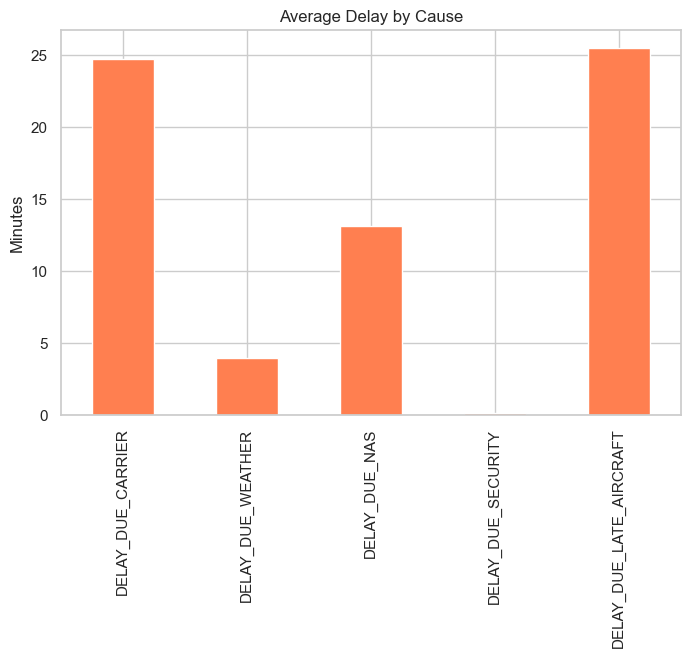

In [39]:
delay_cols = [
    'DELAY_DUE_CARRIER', 
    'DELAY_DUE_WEATHER', 
    'DELAY_DUE_NAS', 
    'DELAY_DUE_SECURITY', 
    'DELAY_DUE_LATE_AIRCRAFT'
]

mean_delays = df[delay_cols].mean()
mean_delays.plot(kind='bar', figsize=(8,5), color="coral")
plt.title("Average Delay by Cause")
plt.ylabel("Minutes")
plt.show()


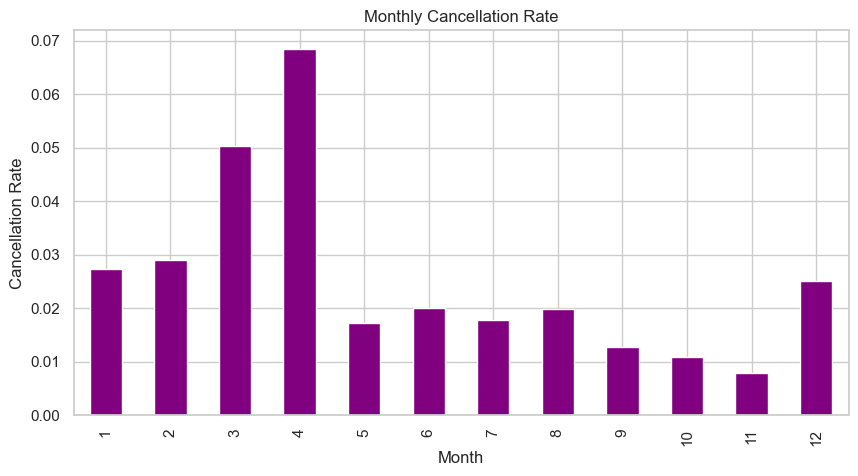

In [41]:
monthly_cancels = df.groupby('Month')['CANCELLED'].mean()
monthly_cancels.plot(kind='bar', figsize=(10,5), color="purple")
plt.title("Monthly Cancellation Rate")
plt.ylabel("Cancellation Rate")
plt.show()


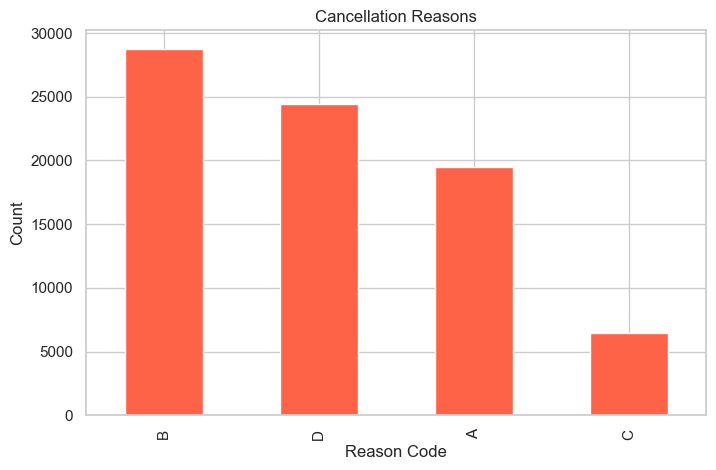

In [43]:
df['CANCELLATION_CODE'].value_counts().plot(kind='bar', figsize=(8,5), color="tomato")
plt.title("Cancellation Reasons")
plt.xlabel("Reason Code")
plt.ylabel("Count")
plt.show()


In [63]:
df['ARR_TIME'] = pd.to_datetime(df['ARR_TIME'])
print(df)

           FL_DATE                 AIRLINE                 AIRLINE_DOT  \
0       2019-01-09   United Air Lines Inc.   United Air Lines Inc.: UA   
1       2022-11-19    Delta Air Lines Inc.    Delta Air Lines Inc.: DL   
2       2022-07-22   United Air Lines Inc.   United Air Lines Inc.: UA   
3       2023-03-06    Delta Air Lines Inc.    Delta Air Lines Inc.: DL   
4       2020-02-23        Spirit Air Lines        Spirit Air Lines: NK   
...            ...                     ...                         ...   
2999995 2022-11-13  American Airlines Inc.  American Airlines Inc.: AA   
2999996 2022-11-02  American Airlines Inc.  American Airlines Inc.: AA   
2999997 2022-09-11    Delta Air Lines Inc.    Delta Air Lines Inc.: DL   
2999998 2019-11-13        Republic Airline        Republic Airline: YX   
2999999 2019-06-15  Southwest Airlines Co.  Southwest Airlines Co.: WN   

        AIRLINE_CODE  DOT_CODE  FL_NUMBER ORIGIN          ORIGIN_CITY DEST  \
0                 UA     19977   